# Computational Finance
## Series 8
Tientso Ning

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [116]:
class Agent:
    def __init__(self, M,S):
        #define strategies
        self.pool = []
        for i in range(S):
            self.pool.append(np.random.randint(0,2,2**M))
        
        #define scores for strategies
        self.scores = []
        for i in range(len(self.pool)):
            self.scores.append(0)
        self.strat = None
            
        #player conditions
        self.acted = False
        self.points = 0
    
    def act(self, mu, history):
        #choose strategy from pool based on score
        self.strat = np.random.choice(np.where(self.scores==np.max(self.scores))[0])
        selection = self.pool[self.strat]
        
        #act according to strategy
        action = selection[history[mu]]
        if action:
            self.acted = True
            return 1
        else:
            self.acted = False
            return -1
        
    def update(self, attendance):
        #update based on attendance
        if np.sign(attendance) == np.sign(1) and self.acted:
            #suceed, increase player points
            self.points += 1
            
        else:
            #you suck and get nothing
            self.points -= 1
        
        #update strategy score
        self.scores[self.strat] -= self.acted*attendance

class Game:
    
    def __init__(self, N, M, T, S):
        self.N = N
        self.M = M
        self.T = T
        self.S = S
        self.A = []
        self.results = []
        
        #define the history table
        self.history_table = {}
        idx = 0
        for x in itertools.product("01", repeat=self.M):
            self.history_table["".join(x)] = idx
            idx += 1
        
        #generate players
        self.player = []
        for p in range(self.N):
            self.player.append(Agent(self.M, self.S)) #create new agent
        
    def run(self):
        
        #generate the first mu
        mu = "".join(list(np.random.randint(0,2,self.M).astype(str)))
        
        #run for T iterations
        for t in range(self.T):
            
            #clear attendance
            self.attendance = 0
        
            #let each agent do their thang
            for i in range(self.N):
                self.attendance += self.player[i].act(mu, self.history_table)
                self.A.append(self.attendance)
            
            #update
            for i in range(self.N):
                self.player[i].update(self.attendance)
                
            #update the mu
            mu = mu+str(np.random.randint(0,2))
            mu = mu[1:]
        
        #create results and publish
        for i in range(self.N):
            self.results.append(self.player[i].points)
        
        return self.results, self.A

In [124]:
game = Game(15, 5, 100, 2)
test_results, test_A = game.run()

In [132]:
#run the game a bunch of times
variances = []
x_axis = []

for i in range(51, 1001,100):
    game = Game(i, 5, 100, 2)
    test_results, test_A = game.run()
    var_ = pd.DataFrame(test_A).var()[0]
    variances.append(var_/i)
    x_axis.append(2**5/i)

Text(0.5, 1.0, 'Minority Game')

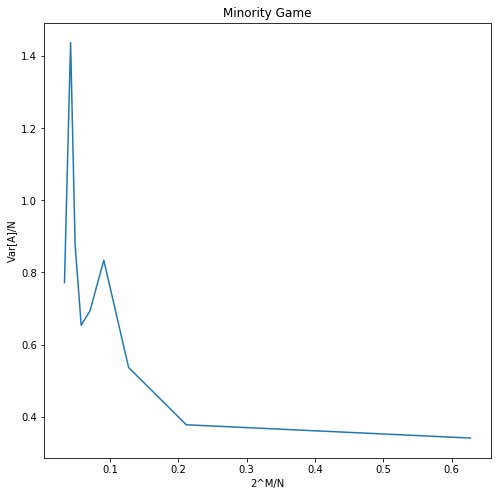

In [139]:
plt.figure(figsize=(8,8))
plt.plot(x_axis,variances)
plt.xlabel("2^M/N")
plt.ylabel("Var[A]/N")
plt.title("Minority Game")

As we can see from the graph, the critical point should be around `0.2119205298013245` for when `Var[A]/N` is at a minimum.